# Shiuli Subhra Ghosh(MDS202035), Suman Roy(MDS202041)

# DNN: Fashion MNIST

## Date: 19.11.2021

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F

Using GPU for computation:

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


### Importing the Data Set

In [22]:
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor(),
                                                                    transforms.Normalize((0.2860,), (0.3530,))]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor(),
                                                                  transforms.Normalize((0.2860,), (0.3530,))]))

In [21]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=1000,shuffle=True)

In [20]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

Mean=0.2860,std=0.3530. These have been used to normalise the tensor. 

### Visualisation of Dataset

In [24]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

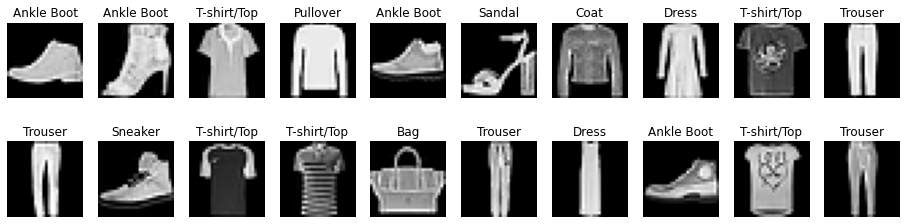

In [25]:
plt.figure(figsize=(16, 4))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(20):
    image = image_batch[i]
    label = output_label(label_batch[i])
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy(),cmap='gray')
    plt.axis('off')
    plt.title(label)

### Building the Deep Neural Network

In [26]:
input_size  = 28*28   # images are 28x28 pixels
output_size = 10      # there are 10 classes

In [32]:
# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

accuracy_list = []
# we pass a model object to this trainer, and it trains this model for one epoch
def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [28]:
class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 300), 
            nn.ReLU(), 
            nn.Linear(300,200),
            nn.ReLU(),
            nn.Linear(200,100), 
            nn.ReLU(), 
            nn.Linear(100, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)

In [33]:
print("Training on ", device)
model_fnn = FC2Layer(input_size, output_size)
model_fnn.to(device)
optimizer = optim.Adam(model_fnn.parameters())
print('Number of parameters: {}'.format(get_n_params(model_fnn)))

for epoch in range(0, 10):
    train(epoch, model_fnn)
    test(model_fnn)

Training on  cuda:0
Number of parameters: 316810
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.283525
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.411667
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.458880
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.512639
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.502689
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.355819

Test set: Average loss: 0.4025, Accuracy: 8504/10000 (85%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.550217
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.208745
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.519165
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.422293
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.379881
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.332584

Test set: Average loss: 0.3559, Accuracy: 8698/10000 (87%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.355304
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.401538
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.399595
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.374966
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.3

So the test accuracy is coming as 89%.
We have run 10 epochs.

### Visualising the performance of the neural network on test set

In [34]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([real_label, class_names[pred_label]])
    
    ax2.barh(np.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(class_names)
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

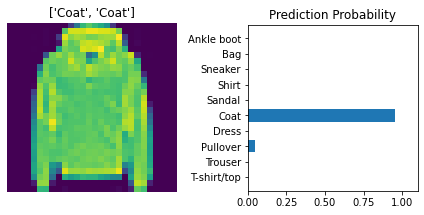

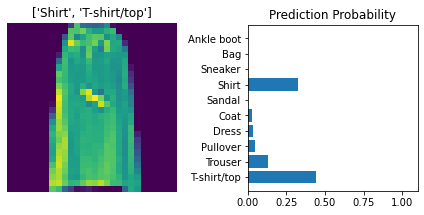

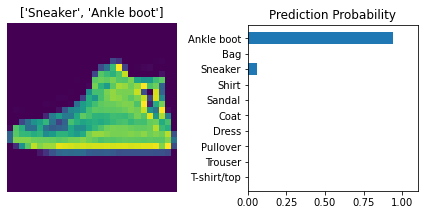

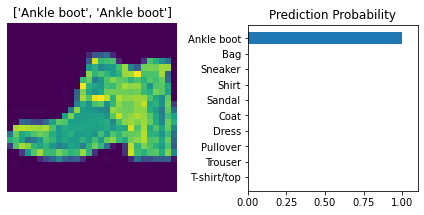

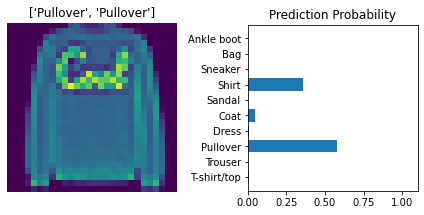

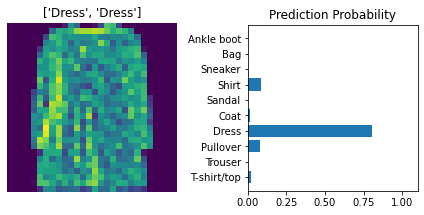

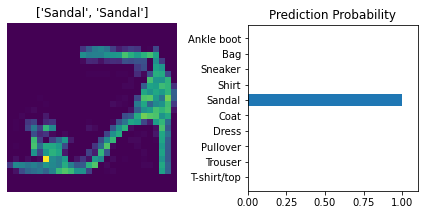

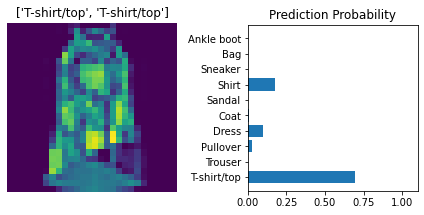

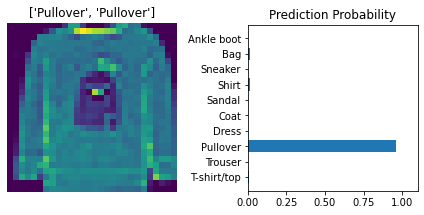

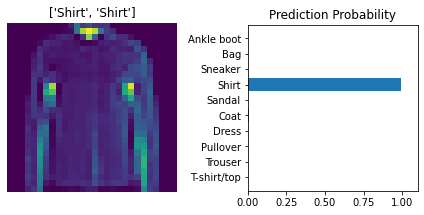

In [35]:
model_fnn.to('cpu') 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = class_names[label_batch[i].item()]
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob =torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

So in this visualisation we can see that the network correctly classifies 9 out of 10 randomly drawn test samples. 

### Scrambling of images

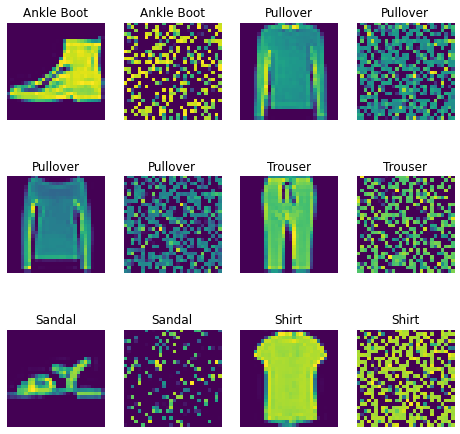

In [36]:
fixed_perm = torch.randperm(784) # Fix a permutation of the image pixels; We apply the same permutation to all images

# show some training images
plt.figure(figsize=(8, 8))

# fetch a batch of train images; RANDOM
image_batch, label_batch = next(iter(train_loader))

for i in range(6):
    image = image_batch[i]
    image_perm = image.view(-1, 28*28).clone()
    image_perm = image_perm[:, fixed_perm]
    image_perm = image_perm.view(-1, 1, 28, 28)
    
    label = output_label(label_batch[i])
    plt.subplot(3,4 , 2*i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(label)
    plt.subplot(3, 4, 2*i+2)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')
    plt.title(label)

### Building the neural network on scrambling image data

In [39]:
accuracy_list = []

def scramble_train(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def scramble_test(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [40]:
print("Training on ", device)
model_fnn_2 = FC2Layer(input_size, output_size)
model_fnn_2.to(device)
optimizer = optim.SGD(model_fnn_2.parameters(), lr=0.01, momentum=0.5)
print('Number of parameters: {}'.format(get_n_params(model_fnn_2)))

for epoch in range(0, 10):
    scramble_train(epoch, model_fnn_2, fixed_perm)
    scramble_test(model_fnn_2, fixed_perm)

Training on  cuda:0
Number of parameters: 316810
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.310864
Train Epoch: 0 [10000/60000 (17%)]	Loss: 1.826239
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.960127
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.675551
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.568405
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.688024

Test set: Average loss: 0.6046, Accuracy: 7797/10000 (78%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.535189
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.690835
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.622388
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.495649
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.529761
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.530641

Test set: Average loss: 0.5046, Accuracy: 8131/10000 (81%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.448771
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.488156
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.431199
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.521443
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.3

So the final test accuracy is 87%, which is a little less than the previous non-scrambled images(89%). But still the accuracy is very good. So we can say that the DNN's performance is not that much dependent upon the pictorical representation of the pixel values or DNN does not capture visual informaton.

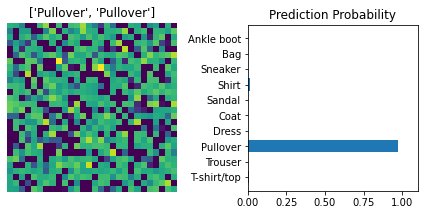

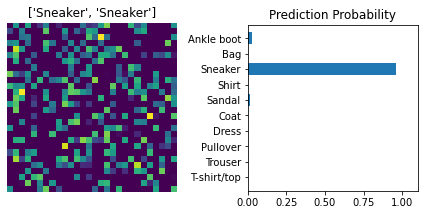

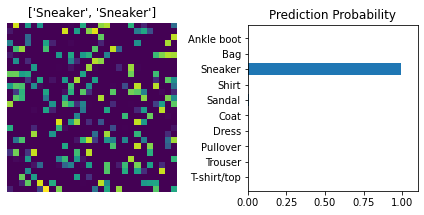

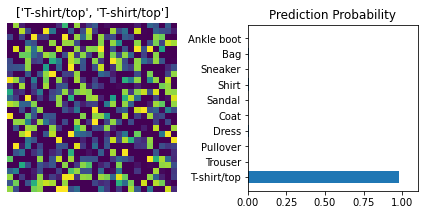

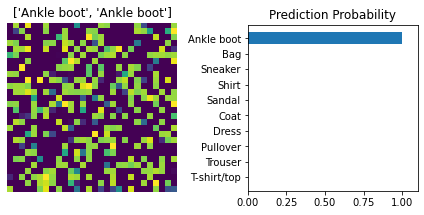

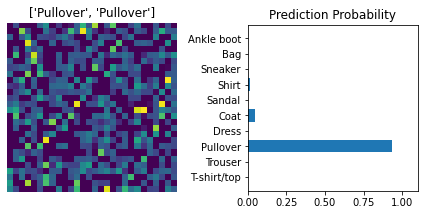

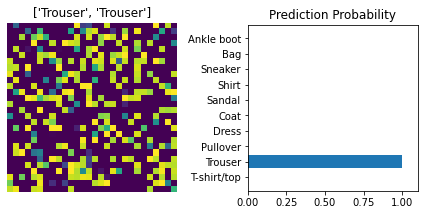

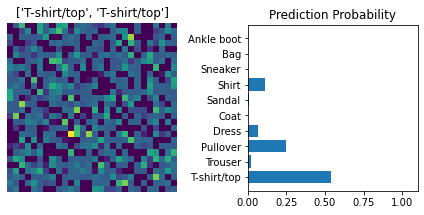

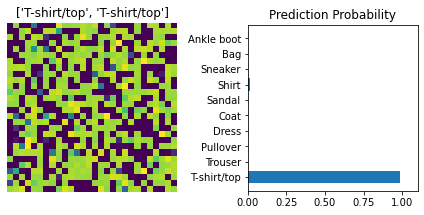

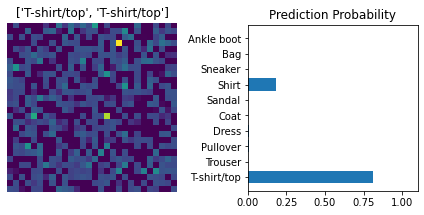

In [42]:
model_fnn_2.to('cpu') 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_fnn_2(image_batch_scramble)
for i in range(10):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = class_names[label_batch[i].item()]
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)
    
    

Here we can see that the DNN has correctly classified 10 out 10 randomly drawn scrambled image samples out of the test dataset. So it clearly does not take visual information. 

# CNN : fashion MNIST

### Building a CNN

In [43]:
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

accuracy_list = []
# we pass a model object to this trainer, and it trains this model for one epoch
def train2(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        optimizer.zero_grad()
        output = model(data)
        #loss = F.nll_loss(output, target)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test2(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        #test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [44]:
class CNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3,padding=0)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=6,padding=0)
        self.conv3 = nn.Conv2d(in_channels=24, out_channels=32, kernel_size=6,padding=0)
        self.fc1 = nn.Linear(8*4*4, 200)
        self.fc2 = nn.Linear(200, 10)
        
    def forward(self, x, verbose=False):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, 8*4*4)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

The CNN has 3 convolution layer and 2 fully connected layers.

In [47]:
print("Training on ", device)
model_cnn = CNN(input_size, output_size)
model_cnn.to(device)
optimizer = optim.Adam(model_cnn.parameters())
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

for epoch in range(0, 10):
    train2(epoch, model_cnn)
    test2(model_cnn)

Training on  cuda:0
Number of parameters: 66002
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.300992
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.691718
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.470565
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.520858
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.542713
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.368668

Test set: Average loss: 0.4552, Accuracy: 8319/10000 (83%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.453361
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.350043
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.620085
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.323735
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.289081
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.513521

Test set: Average loss: 0.3825, Accuracy: 8607/10000 (86%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.478135
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.329700
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.267611
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.342235
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.17

So, the final test accuracy 90% is which is an improvement over the DNN(89%).

### Visualising the prediction made by CNN 

In [48]:
def visualize_pred(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([real_label, class_names[pred_label]])
    
    ax2.barh(np.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(class_names)
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

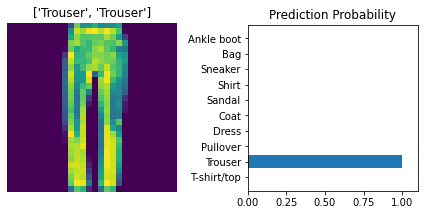

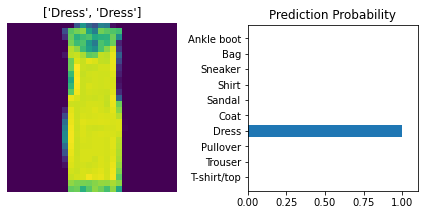

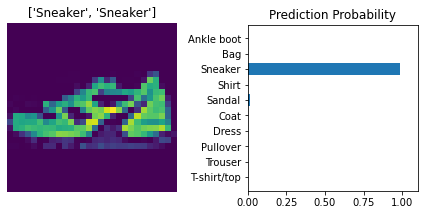

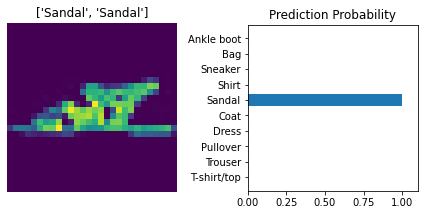

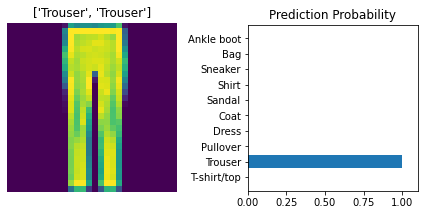

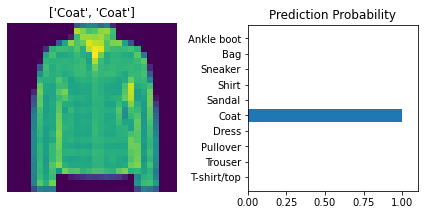

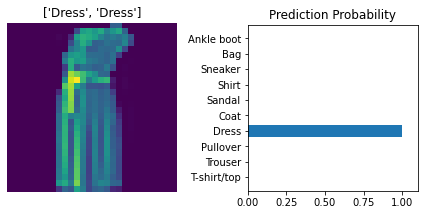

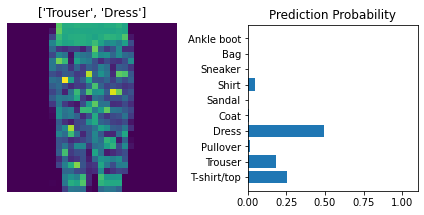

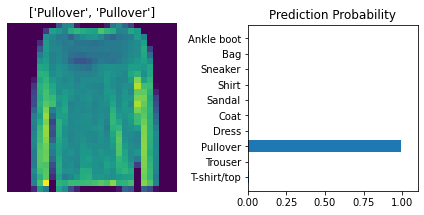

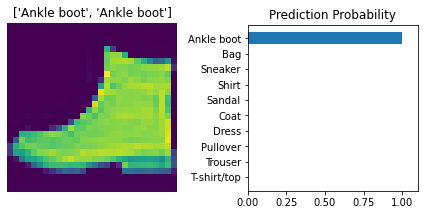

In [49]:
model_cnn.to('cpu') 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))

# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = class_names[label_batch[i].item()]
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob =torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img, pred_prob, real_label)

So the CNN correctly classifies 9 out 10 randomly drawn test samples

### CNN from Scrambling images

In [52]:
accuracy_list = []

def scramble_train1(epoch, model, perm=torch.arange(0, 784).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), 
                                                                           len(train_loader.dataset),
                                                                           100. * batch_idx / len(train_loader), loss.item()))
def scramble_test1(model, perm=torch.arange(0, 784).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 28*28)
        data = data[:, perm]
        data = data.view(-1, 1, 28, 28)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

In [54]:
print("Training on ", device)
model_cnn_3 = CNN(input_size, output_size)
model_cnn_3.to(device)
optimizer = optim.SGD(model_cnn_3.parameters(),lr=0.01)
print('Number of parameters: {}'.format(get_n_params(model_cnn_3)))

for epoch in range(0, 10):
    scramble_train1(epoch, model_cnn_3, fixed_perm)
    scramble_test1(model_cnn_3, fixed_perm)

Training on  cuda:0
Number of parameters: 66002
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.315048
Train Epoch: 0 [10000/60000 (17%)]	Loss: 2.282934
Train Epoch: 0 [20000/60000 (33%)]	Loss: 2.250892
Train Epoch: 0 [30000/60000 (50%)]	Loss: 2.127356
Train Epoch: 0 [40000/60000 (67%)]	Loss: 1.866027
Train Epoch: 0 [50000/60000 (83%)]	Loss: 1.622709

Test set: Average loss: 1.2848, Accuracy: 5580/10000 (56%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 1.227803
Train Epoch: 1 [10000/60000 (17%)]	Loss: 1.073107
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.899405
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.804208
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.714260
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.680950

Test set: Average loss: 0.7047, Accuracy: 7445/10000 (74%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.603892
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.528241
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.635082
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.661807
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.77

So the Accuracy has dropped to 85% from 90%. Though this is not a significant drop, it is more than that of DNN. So CNN is more sensitive to visual information. 

### Visualisation of prediction made by CNN on scrambled images

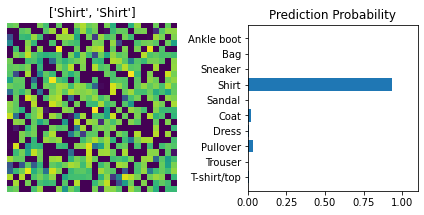

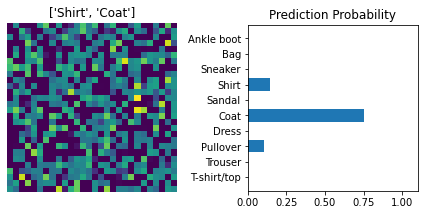

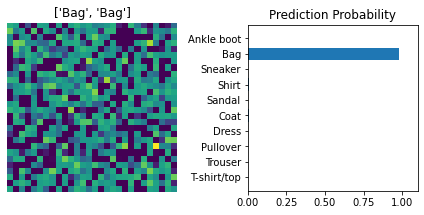

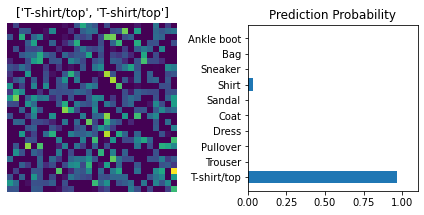

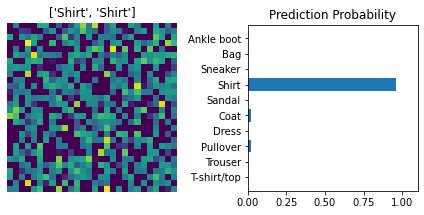

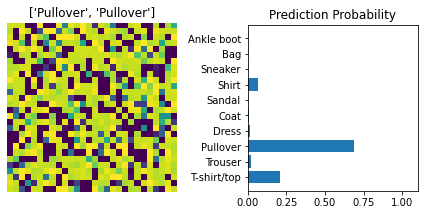

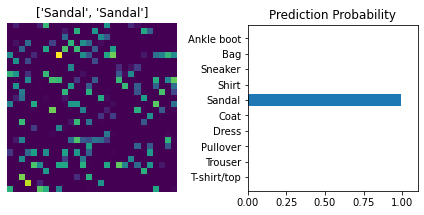

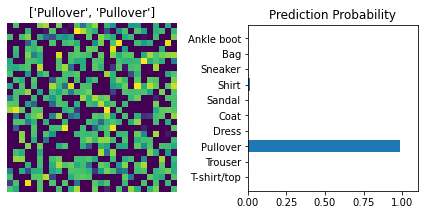

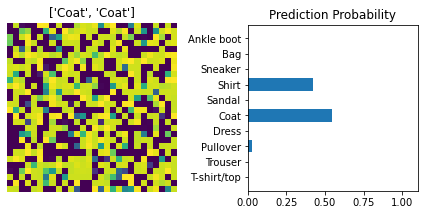

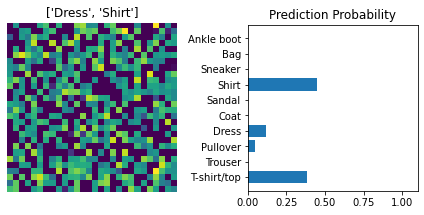

In [56]:
model_cnn_3.to('cpu') 

# fetch a batch of test images
image_batch, label_batch = next(iter(test_loader))
image_batch_scramble = image_batch.view(-1, 28*28)
image_batch_scramble = image_batch_scramble[:, fixed_perm]
image_batch_scramble = image_batch_scramble.view(-1, 1, 28, 28)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = model_cnn_3(image_batch_scramble)
for i in range(10):
    img = image_batch[i]
    img_perm = image_batch_scramble[i]
    real_label = class_names[label_batch[i].item()]
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob = torch.exp(log_pred_prob).data.numpy().squeeze()
    visualize_pred(img_perm, pred_prob, real_label)

So the CNN correctly classifies 8 out of 10 randomly drawn samples from scrambled image test dataset

# Sign Language: DNN

### Building the DNN

In [62]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable

from sklearn.model_selection import train_test_split


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1   = nn.Linear(64*64, 200)  
        self.fc2   = nn.Linear(200,100)
        self.fc3   = nn.Linear(100, 80)
        self.fc4   = nn.Linear(80,10)

    def forward(self, x):
        x = x.view(-1, 64*64)

        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.relu(self.fc3(out))
        out = self.fc4(out)
        #x = F.log_softmax(x, dim=1)
        return out


class SignLanguageDataSet(Dataset):
    """ sign language dataset"""

    def __init__(self, X, Y, onehot=True):
        """
        :param X: numpy.array
        :param Y: numpy.array
        """
        X = X.reshape((-1, 1, 64, 64))  # we need to add a channel, so we can use convolution
        if onehot:  # the Y from npy is onehot-encoded, need to convert to interger
            Y = np.argmax(Y, axis=1)

        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, idx):
        X = self.X[idx]
        Y = self.Y[idx]

        sample = {'X': X, 'Y': Y}
        return sample

X = np.load('X.npy')
Y = np.load('Y.npy')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

trainSignData = SignLanguageDataSet(x_train, y_train, onehot=True)
trainDataLoader = DataLoader(trainSignData, shuffle=True, batch_size=50)

testSignData = SignLanguageDataSet(x_test, y_test, onehot=True)
testDataLoader = DataLoader(testSignData, shuffle=False, batch_size=100)

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0015)
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch


def train3(epoch):
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, sample in enumerate(trainDataLoader):
        optimizer.zero_grad()
        inputs, targets = Variable(sample['X']), Variable(sample['Y'])
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    #print('TRAIN Epoch %d | Loss: %.3f | Acc: %.3f%% (corret=%d, total=/%d)' % 
          #(epoch, train_loss/ (batch_idx + 1), 100.*correct/total,correct, total))
    return(100.*correct/total)



def test3(epoch):
    net.eval()
    test_loss = 0
    correct = 0
    total = 0
    for batch_idx, sample in enumerate(testDataLoader):
        inputs, targets = Variable(sample['X'], volatile=True), Variable(sample['Y'])
        outputs = net(inputs)
        loss = criterion(outputs, targets)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    #print('TEST Epoch %d | Loss: %.3f | Acc: %.3f%% (correct=%d,total=/%d)' % 
          #(epoch, test_loss/ (batch_idx + 1) , 100.*correct/total,correct, total))
    return(100.*correct/total)

no_epoch=100
if __name__ == '__main__':
    for epoch in range(start_epoch, start_epoch+no_epoch):
        x=train3(epoch)
        y=test3(epoch)
        if epoch==(start_epoch+no_epoch-1):
            print("\n Final Train Accuracy: ",int(x)+1,"% \n")
            print("\n Final Test Accuracy: ",int(y)+1,"% \n")










<ipython-input-62-a1ba403e6d9c>:102: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, targets = Variable(sample['X'], volatile=True), Variable(sample['Y'])



 Final Train Accuracy:  84 % 


 Final Test Accuracy:  83 % 



### Visualising the Dataset

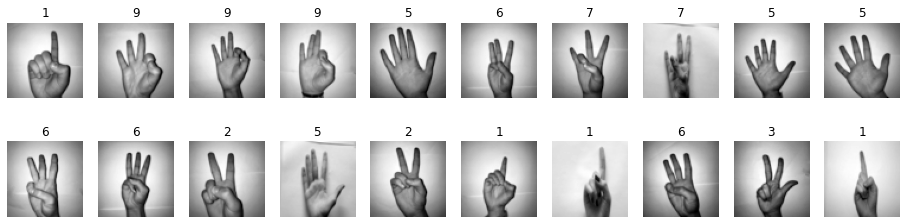

In [59]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16, 4))

label_list=[9,0,7,6,1,8,4,3,2,5]
# fetch a batch of train images; RANDOM
sample = next(iter(trainDataLoader))

for i in range(20):
    image_batch, label_batch = Variable(sample['X']), Variable(sample['Y'])
    image = image_batch[i]
    label = label_list[int(label_batch[i])]
    plt.subplot(2, 10, i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy(),cmap='gray')
    plt.axis('off')
    plt.title(label)

### Visualising the prediction made by DNN

In [60]:
def visualize_pred2(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()
    label_list=[9,0,7,6,1,8,4,3,2,5]
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([label_list[real_label], label_list[pred_label]])
    
    ax2.barh(np.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(label_list)
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

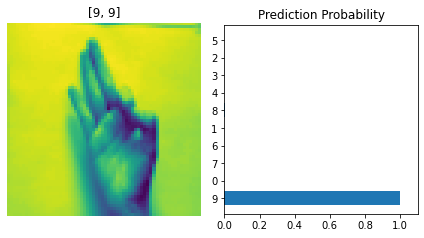

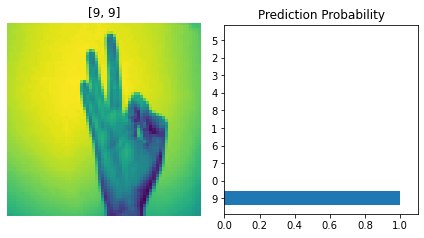

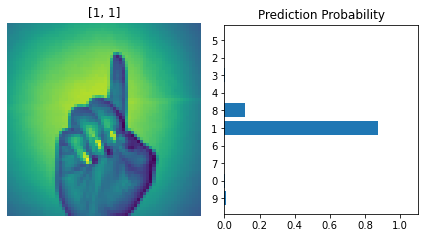

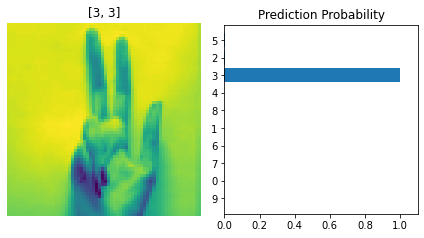

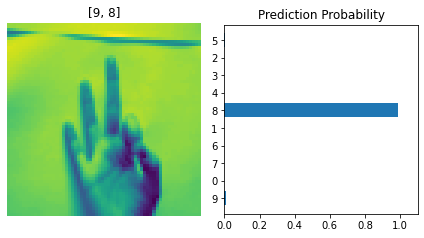

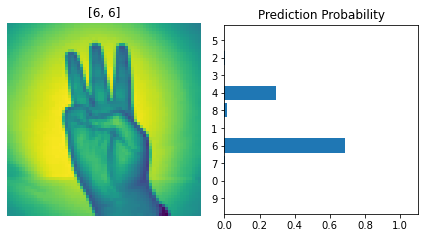

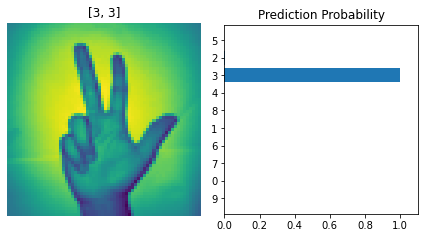

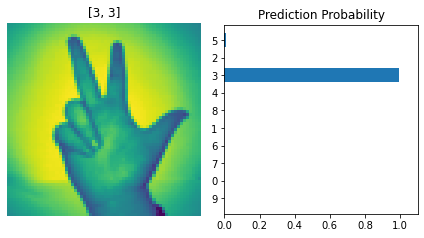

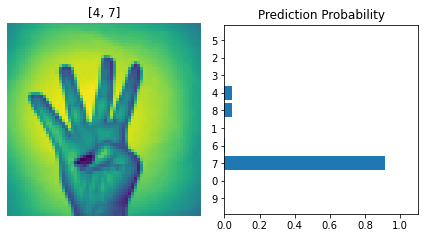

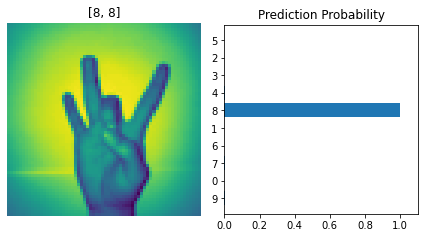

In [63]:
net.to('cpu') 

# fetch a batch of test images
sample2 = next(iter(testDataLoader))
image_batch, label_batch = Variable(sample2['X']), Variable(sample2['Y'])
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = net(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = int(label_batch[i])
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob =torch.exp(log_pred_prob).data.numpy().squeeze()
    pred_prob2=pred_prob/sum(pred_prob)
    #print(sum(pred_prob2))
    visualize_pred2(img, pred_prob2, real_label)

So the DNN correctly classifies 8 out of 10 samples drawn from test set randomly

### Scrambling the images and building a DNN

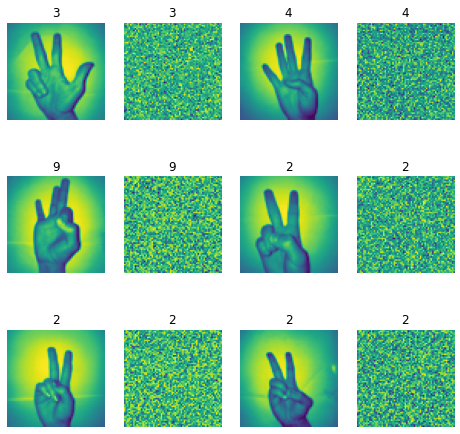

In [64]:
fixed_perm = torch.randperm(4096) # Fix a permutation of the image pixels; We apply the same permutation to all images

# show some training images
plt.figure(figsize=(8, 8))

# fetch a batch of train images; RANDOM
sample = next(iter(trainDataLoader))
image_batch, label_batch = Variable(sample['X']), Variable(sample['Y'])


for i in range(6):
    image = image_batch[i]
    image_perm = image.view(-1, 64*64).clone()
    image_perm = image_perm[:, fixed_perm]
    image_perm = image_perm.view(-1,1, 64,64)
    label_list=[9,0,7,6,1,8,4,3,2,5]
    label = label_list[(label_batch[i])]
    plt.subplot(3,4 , 2*i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(label)
    plt.subplot(3, 4, 2*i+2)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')
    plt.title(label)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

import torch.utils.data as data_utils

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

X = np.load("X.npy")
Y = np.load("Y.npy")

X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

Y = np.argmax(Y,axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
input_size=64*64
output_size=10
train = data_utils.TensorDataset(X_train, y_train)
train_loader = DataLoader(train, batch_size=32, shuffle=True)

test = data_utils.TensorDataset(X_test, y_test)
test_loader = DataLoader(test, batch_size=32, shuffle=True)

class FC2Layer(nn.Module):
    def __init__(self, input_size, output_size):
        super(FC2Layer, self).__init__()
        self.input_size = input_size
        self.network = nn.Sequential(
            nn.Linear(input_size, 200), 
            nn.ReLU(), 
            nn.Linear(200,100),
            nn.ReLU(),
            nn.Linear(100,60), 
            nn.ReLU(), 
            nn.Linear(60, output_size), 
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        x = x.view(-1, self.input_size)
        return self.network(x)
    
fixed_perm = torch.randperm(64*64) 

accuracy_list = []

def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

def scramble_train(epoch, model, perm=torch.arange(0, 64*64).long()):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 64*64)
        data = data[:, perm]
        data = data.view(-1, 1, 64, 64)

        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def scramble_test(model, perm=torch.arange(0, 64*64).long()):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        # send to device
        data, target = data.to(device), target.to(device)
        
        # permute pixels
        data = data.view(-1, 64*64)
        data = data[:, perm]
        data = data.view(-1, 1, 64, 64)
        
        output = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)
    accuracy_list.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), accuracy))
    
    
print("Training on ", device)
model_fnn_2 = FC2Layer(input_size, output_size)
model_fnn_2.to(device)
#optimizer = optim.SGD(model_fnn_2.parameters(), lr=0.01, momentum=0.5)
optimizer = optim.Adam(model_fnn_2.parameters(), lr=0.001)


print('Number of parameters: {}'.format(get_n_params(model_fnn_2)))

for epoch in range(0, 20):
    scramble_train(epoch, model_fnn_2, fixed_perm)
    scramble_test(model_fnn_2, fixed_perm)

cuda:0
Training on  cuda:0
Number of parameters: 846170
Train Epoch: 0 [0/1649 (0%)]	Loss: 2.302281
Train Epoch: 0 [320/1649 (19%)]	Loss: 2.270533
Train Epoch: 0 [640/1649 (38%)]	Loss: 2.329463
Train Epoch: 0 [960/1649 (58%)]	Loss: 2.300278
Train Epoch: 0 [1280/1649 (77%)]	Loss: 2.311106
Train Epoch: 0 [1600/1649 (96%)]	Loss: 2.297834

Test set: Average loss: 2.3024, Accuracy: 40/413 (10%)

Train Epoch: 1 [0/1649 (0%)]	Loss: 2.335884
Train Epoch: 1 [320/1649 (19%)]	Loss: 2.285671
Train Epoch: 1 [640/1649 (38%)]	Loss: 2.306779
Train Epoch: 1 [960/1649 (58%)]	Loss: 2.298273
Train Epoch: 1 [1280/1649 (77%)]	Loss: 2.284067
Train Epoch: 1 [1600/1649 (96%)]	Loss: 2.277816

Test set: Average loss: 2.3035, Accuracy: 32/413 (8%)

Train Epoch: 2 [0/1649 (0%)]	Loss: 2.267760
Train Epoch: 2 [320/1649 (19%)]	Loss: 2.310133
Train Epoch: 2 [640/1649 (38%)]	Loss: 2.256559
Train Epoch: 2 [960/1649 (58%)]	Loss: 2.228708
Train Epoch: 2 [1280/1649 (77%)]	Loss: 2.249475
Train Epoch: 2 [1600/1649 (96%)]	Los

So the final test accuracy is 69%, the accuracy drops but not by a significant amount. So the DNN is not sensitive to visual information. 

# Sign Language: CNN

In [78]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable

from sklearn.model_selection import train_test_split


class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=9)  # 60 * 60
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7)  #
        self.fc1   = nn.Linear(11*11*6, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))  # None * 3 * 56 * 56 
        out = F.max_pool2d(out, 2)  # None * 3 * 28 * 28
        out = F.relu(self.conv2(out))  # None * 6 * 22 * 22
        out = F.max_pool2d(out, 2)    # None * 6 * 11 * 11
        out = out.view(out.size(0), -1)  #
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out


class SignLanguageDataSet(Dataset):
    """ sign language dataset"""

    def __init__(self, X, Y, onehot=True):
        """
        :param X: numpy.array
        :param Y: numpy.array
        """
        X = X.reshape((-1, 1, 64, 64))  # we need to add a channel, so we can use convolution
        if onehot:  # the Y from npy is onehot-encoded, need to convert to interger
            Y = np.argmax(Y, axis=1)

        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)

    def __len__(self):
        return len(self.Y)

    def __getitem__(self, idx):
        X = self.X[idx]
        Y = self.Y[idx]

        sample = {'X': X, 'Y': Y}
        return sample

X = np.load('X.npy')
Y = np.load('Y.npy')
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

trainSignData = SignLanguageDataSet(x_train, y_train, onehot=True)
trainDataLoader = DataLoader(trainSignData, shuffle=True, batch_size=32)

testSignData = SignLanguageDataSet(x_test, y_test, onehot=True)
testDataLoader = DataLoader(testSignData, shuffle=False, batch_size=32)

net4 = Net4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net4.parameters(), lr=0.001)
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch


def train4(epoch):
    net4.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, sample in enumerate(trainDataLoader):
        optimizer.zero_grad()
        inputs, targets = Variable(sample['X']), Variable(sample['Y'])
        outputs = net4(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    print('TRAIN Epoch %d | Loss: %.3f | Acc: %.3f%% (corret=%d, total=/%d)' % 
          (epoch, train_loss/ (batch_idx + 1), 100.*correct/total,correct, total))
    return(100.*correct/total)


def test4(epoch):
    net4.eval()
    test_loss = 0
    correct = 0
    total = 0
    for batch_idx, sample in enumerate(testDataLoader):
        inputs, targets = Variable(sample['X'], volatile=True), Variable(sample['Y'])
        outputs = net4(inputs)
        loss = criterion(outputs, targets)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    print('TEST Epoch %d | Loss: %.3f | Acc: %.3f%% (correct=%d,total=/%d)' % 
          (epoch, test_loss/ (batch_idx + 1) , 100.*correct/total,correct, total))
    
    return(100.*correct/total)                                                     
no_epoch=30

if __name__ == '__main__':
    for epoch in range(start_epoch, start_epoch+no_epoch):
        x=train4(epoch)
        y=test4(epoch)
        if epoch==(start_epoch+no_epoch-1):
            print("\n Final Train Accuracy: ",int(x)+1,"% \n")
            print("\n Final Test Accuracy: ",int(y)+1,"% \n")










TRAIN Epoch 0 | Loss: 2.273 | Acc: 18.496% (corret=305, total=/1649)
TEST Epoch 0 | Loss: 2.074 | Acc: 38.983% (correct=161,total=/413)


<ipython-input-78-5b1f96d86654>:103: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, targets = Variable(sample['X'], volatile=True), Variable(sample['Y'])


TRAIN Epoch 1 | Loss: 1.577 | Acc: 44.087% (corret=727, total=/1649)
TEST Epoch 1 | Loss: 1.155 | Acc: 58.838% (correct=243,total=/413)
TRAIN Epoch 2 | Loss: 0.988 | Acc: 68.041% (corret=1122, total=/1649)
TEST Epoch 2 | Loss: 0.797 | Acc: 76.029% (correct=314,total=/413)
TRAIN Epoch 3 | Loss: 0.737 | Acc: 76.895% (corret=1268, total=/1649)
TEST Epoch 3 | Loss: 0.679 | Acc: 77.966% (correct=322,total=/413)
TRAIN Epoch 4 | Loss: 0.618 | Acc: 79.988% (corret=1319, total=/1649)
TEST Epoch 4 | Loss: 0.581 | Acc: 82.567% (correct=341,total=/413)
TRAIN Epoch 5 | Loss: 0.485 | Acc: 83.869% (corret=1383, total=/1649)
TEST Epoch 5 | Loss: 0.506 | Acc: 84.746% (correct=350,total=/413)
TRAIN Epoch 6 | Loss: 0.437 | Acc: 86.173% (corret=1421, total=/1649)
TEST Epoch 6 | Loss: 0.503 | Acc: 86.199% (correct=356,total=/413)
TRAIN Epoch 7 | Loss: 0.371 | Acc: 88.417% (corret=1458, total=/1649)
TEST Epoch 7 | Loss: 0.435 | Acc: 86.683% (correct=358,total=/413)
TRAIN Epoch 8 | Loss: 0.345 | Acc: 88.478%

### Visualising the prediction

In [80]:
def visualize_pred2(img, pred_prob, real_label):
    ''' Function for viewing an image and it's predicted classes.
    '''
    #pred_prob = pred_prob.data.numpy().squeeze()
    label_list=[9,0,7,6,1,8,4,3,2,5]
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.numpy().squeeze())
    ax1.axis('off')
    pred_label = np.argmax(pred_prob)
    ax1.set_title([label_list[real_label], label_list[pred_label]])
    
    ax2.barh(np.arange(10), pred_prob)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(label_list)
    ax2.set_title('Prediction Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

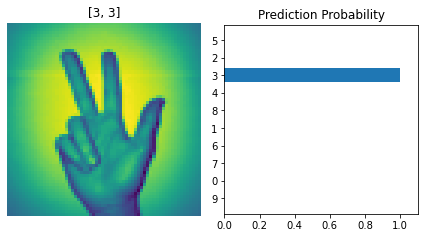

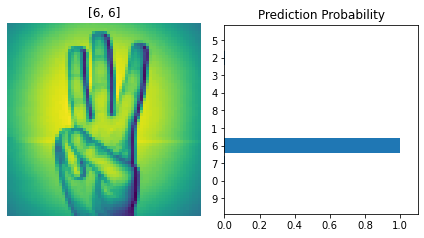

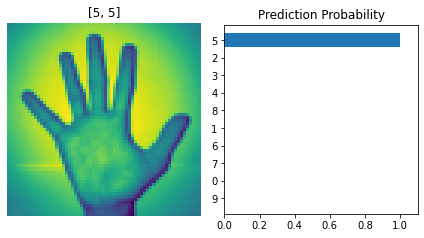

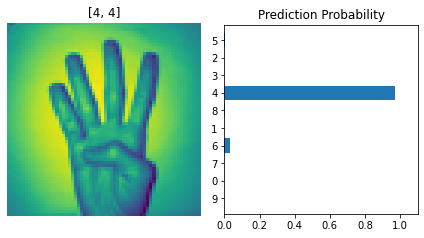

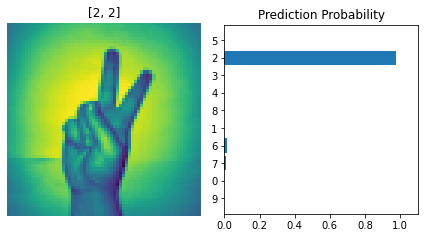

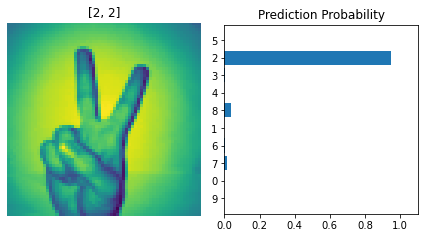

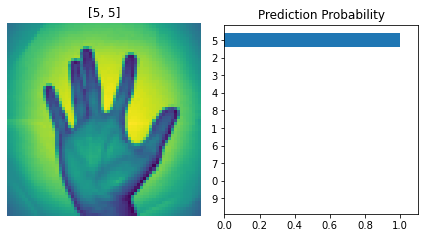

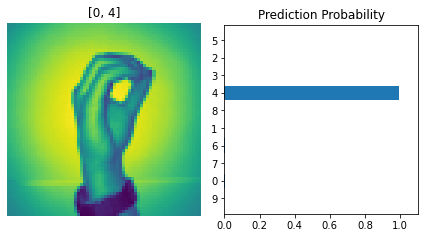

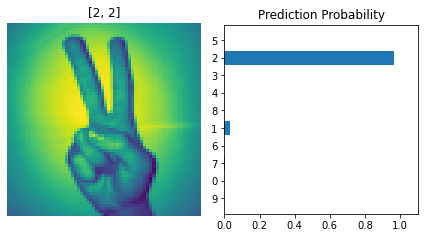

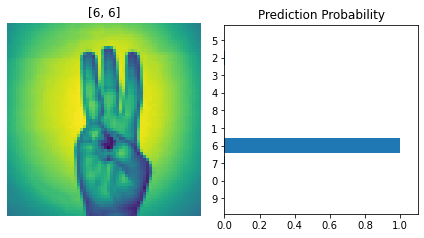

In [81]:
net4.to('cpu') 

# fetch a batch of test images
sample2 = next(iter(testDataLoader))
image_batch, label_batch = Variable(sample2['X']), Variable(sample2['Y'])
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = net4(image_batch)
for i in range(10):
    img = image_batch[i]
    real_label = int(label_batch[i])
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob =torch.exp(log_pred_prob).data.numpy().squeeze()
    pred_prob2=pred_prob/sum(pred_prob)
    #print(sum(pred_prob2))
    visualize_pred2(img, pred_prob2, real_label)

So it is correctly predicting 9 out of 10 randomly drawn samples from test set

### Sacrambling the images and training CNN

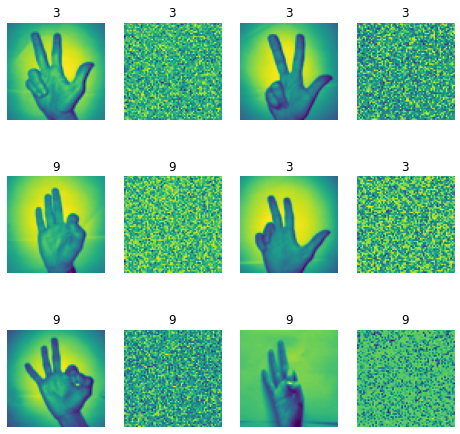

In [82]:
fixed_perm = torch.randperm(4096) # Fix a permutation of the image pixels; We apply the same permutation to all images

# show some training images
plt.figure(figsize=(8, 8))

# fetch a batch of train images; RANDOM
sample = next(iter(trainDataLoader))
image_batch, label_batch = Variable(sample['X']), Variable(sample['Y'])


for i in range(6):
    image = image_batch[i]
    image_perm = image.view(-1, 64*64).clone()
    image_perm = image_perm[:, fixed_perm]
    image_perm = image_perm.view(-1,1, 64,64)
    label_list=[9,0,7,6,1,8,4,3,2,5]
    label = label_list[(label_batch[i])]
    plt.subplot(3,4 , 2*i + 1)
    #image, label = train_loader.dataset.__getitem__(i)
    plt.imshow(image.squeeze().numpy())
    plt.axis('off')
    plt.title(label)
    plt.subplot(3, 4, 2*i+2)
    plt.imshow(image_perm.squeeze().numpy())
    plt.axis('off')
    plt.title(label)

In [83]:
accuracy_list = []

def scramble_train4(epoch,perm=torch.arange(0, 4096).long()):
    net4.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, sample in enumerate(trainDataLoader):
        optimizer.zero_grad()
        inputs, targets = Variable(sample['X']), Variable(sample['Y'])
        inputs = inputs.view(-1, 64*64)
        inputs = inputs[:, perm]
        inputs = inputs.view(-1, 1, 64, 64)
        
        outputs = net4(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    #print('TRAIN Epoch %d | Loss: %.3f | Acc: %.3f%% (corret=%d, total=/%d)' % 
          #(epoch, train_loss/ (batch_idx + 1), 100.*correct/total,correct, total))
    return(100.*correct/total)



def scramble_test4(epoch,perm=torch.arange(0, 4096).long()):
    net4.eval()
    test_loss = 0
    correct = 0
    total = 0
    for batch_idx, sample in enumerate(testDataLoader):
        inputs, targets = Variable(sample['X'], volatile=True), Variable(sample['Y'])
        inputs = inputs.view(-1, 64*64)
        inputs = inputs[:, perm]
        inputs = inputs.view(-1, 1, 64, 64)
        
        outputs = net4(inputs)
        loss = criterion(outputs, targets)

        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += predicted.eq(targets.data).cpu().sum()
    #print('TEST Epoch %d | Loss: %.3f | Acc: %.3f%% (correct=%d,total=/%d)' % 
          #(epoch, test_loss/ (batch_idx + 1) , 100.*correct/total,correct, total))
    return(100.*correct/total)
            


In [84]:
net4 = Net4()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net4.parameters(), lr=0.001)
best_acc = 0  # best test accuracy
start_epoch = 0

no_epoch=25
if __name__ == '__main__':
    for epoch in range(start_epoch, start_epoch+no_epoch):
        x=scramble_train4(epoch,perm=torch.randperm(4096))
        y=scramble_test4(epoch=torch.randperm(4096))
        if epoch==(start_epoch+no_epoch-1):
            print("\n Final Train Accuracy: ",int(x)+1,"% \n")
            print("\n Final Test Accuracy: ",int(y)+1,"% \n")

<ipython-input-83-9b1374d2d985>:36: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs, targets = Variable(sample['X'], volatile=True), Variable(sample['Y'])



 Final Train Accuracy:  11 % 


 Final Test Accuracy:  9 % 



So the accuracy is dropping drastically with respect to DNN. So we can say that CNN takes visual information into account. 

### Visualising the prediction of scrambled dataset

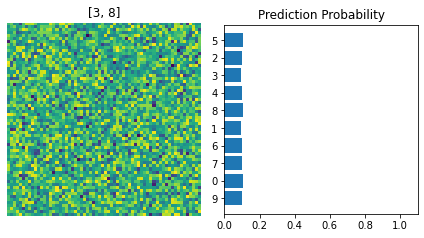

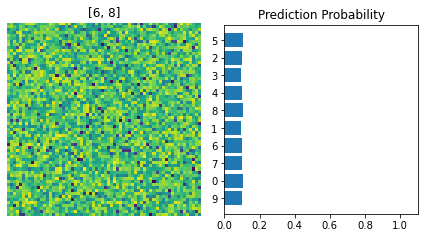

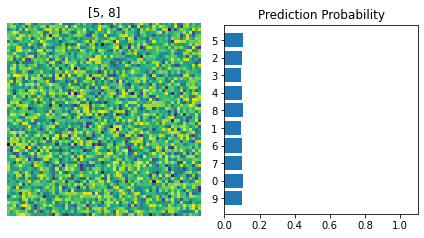

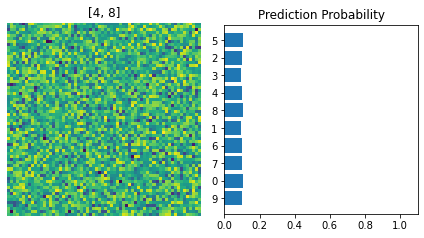

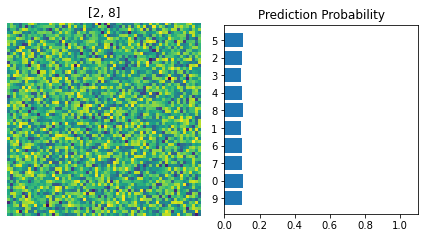

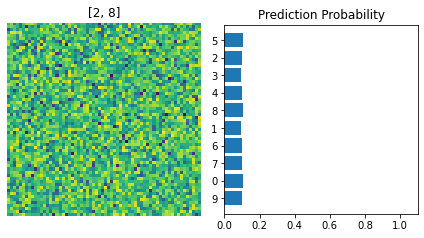

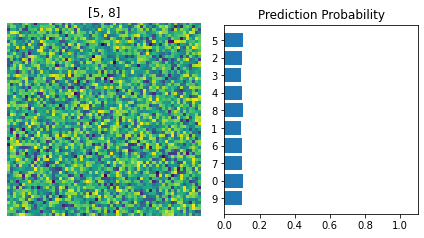

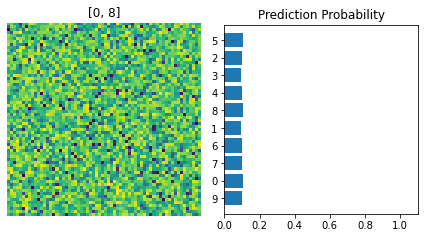

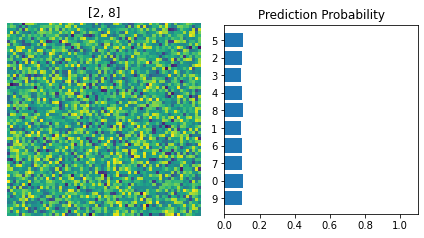

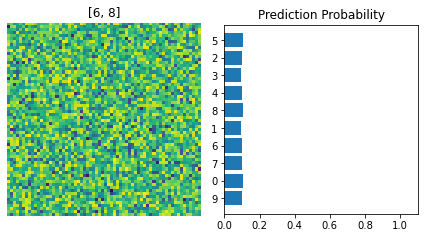

In [85]:
net4.to('cpu') 
fixed_perm = torch.randperm(4096)
# fetch a batch of test images
sample2 = next(iter(testDataLoader))
image_batch, label_batch = Variable(sample2['X']), Variable(sample2['Y'])
image_batch_scramble4 = image_batch.view(-1, 64*64)
image_batch_scramble4 = image_batch_scramble4[:, fixed_perm]
image_batch_scramble4 = image_batch_scramble4.view(-1, 1, 64, 64)
# Turn off gradients to speed up this part
with torch.no_grad():
    log_pred_prob_batch = net4(image_batch_scramble4)
for i in range(10):
    img = image_batch_scramble4[i]
    real_label = int(label_batch[i])
    log_pred_prob = log_pred_prob_batch[i]
    # Output of the network are log-probabilities, need to take exponential for probabilities
    pred_prob =torch.exp(log_pred_prob).data.numpy().squeeze()
    pred_prob2=pred_prob/sum(pred_prob)
    #print(sum(pred_prob2))
    visualize_pred2(img, pred_prob2, real_label)